In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [183]:
df = pd.read_csv("rho_r_vs_T.csv")
data = df.to_numpy()
print(data[0:5,:])

[[310.    36.85   6.67]
 [330.    56.85   7.63]
 [350.    76.85   8.57]
 [370.    96.85   9.52]
 [390.   116.85  10.48]]


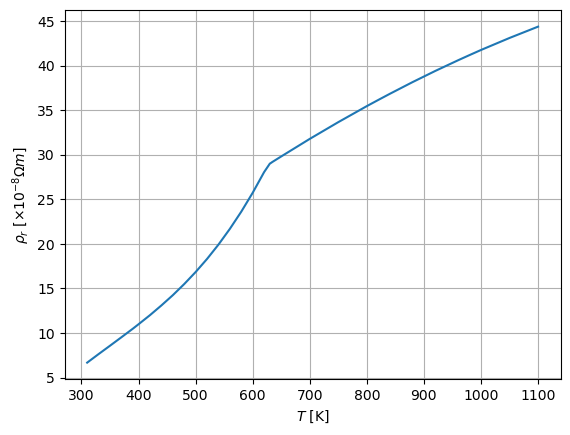

In [184]:
plt.plot(data[:,0],data[:,2])
plt.grid(1)
plt.xlabel("$T$ [K]")
plt.ylabel("$\\rho_r$ [$\\times 10^{-8} \\Omega m$]")
plt.show()

In [185]:
# find the kink
# get the finite difference of rho_r
rho_r = data[:,2]
TK = data[:,0]
d_rho_r = []
for i in range(1,len(rho_r)):
    slope = (rho_r[i] - rho_r[i-1])/(TK[i] - TK[i-1])
    d_rho_r.append(slope)

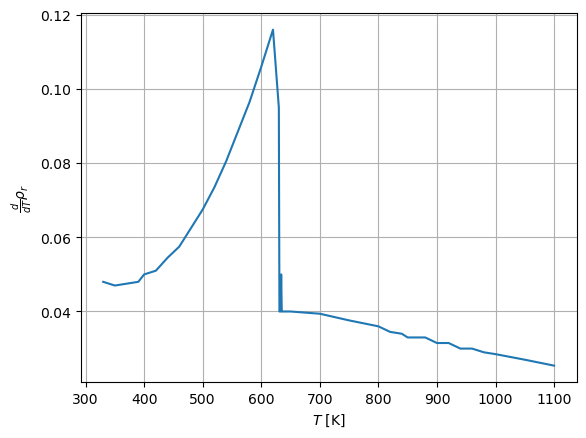

In [186]:
plt.plot(TK[1:],d_rho_r)
plt.grid(1)
plt.xlabel("$T$ [K]")
plt.ylabel("$\\frac{d}{dT}\\rho_r$")
plt.show()

The kink is found at:

In [187]:
idx = 0
for i in range(len(d_rho_r)):
    if d_rho_r[i] == max(d_rho_r):
        idx = i

print(f"kink is located at T = {TK[1+idx]}K")

kink is located at T = 620.0K


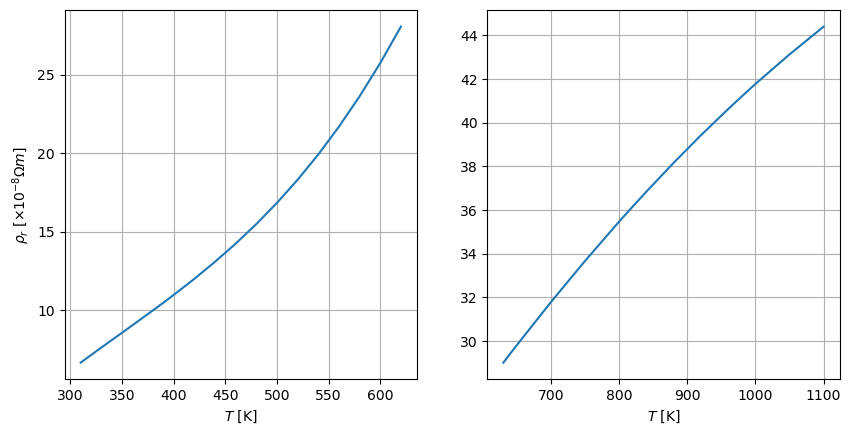

In [188]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
axs[0].plot(TK[0:idx+2],rho_r[0:idx+2])
axs[0].set_ylabel("$\\rho_r$ [$\\times 10^{-8} \\Omega m$]")
axs[0].set_xlabel("$T$ [K]")
axs[1].set_xlabel("$T$ [K]")
axs[1].plot(TK[idx+2:],rho_r[idx+2:])
axs[0].grid(1)
axs[1].grid(1)
plt.show()

In [189]:
def model(poly_deg):
    poly_func = PolynomialFeatures(poly_deg)

    x1 = TK[:idx+2].reshape(-1,1)
    y1 = rho_r[:idx+2].reshape(-1,1)
    t1 = poly_func.fit_transform(x1)

    x2 = TK[idx+2:].reshape(-1,1)
    y2 = rho_r[idx+2:].reshape(-1,1)
    t2 = poly_func.fit_transform(x2)

    model1 = LinearRegression()
    model2 = LinearRegression()
    model1.fit(t1,y1)
    model2.fit(t2,y2)

    y1_pred = model1.predict(t1)
    y2_pred = model2.predict(t2)

    result = np.append(y1_pred,y2_pred)
    return result
    

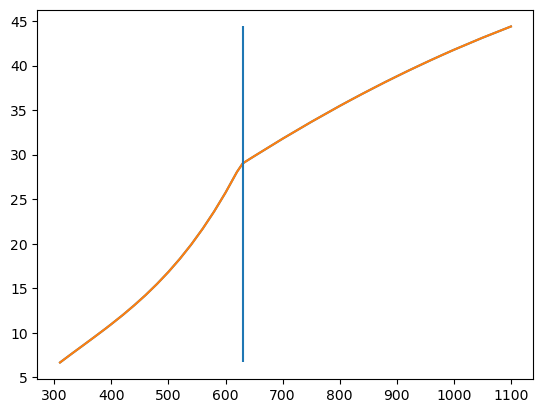

In [190]:
Y = model(3)
plt.plot(TK,rho_r)
plt.plot(TK,Y)
plt.vlines(630,min(rho_r), max(rho_r))
plt.show()

In [191]:
poly_deg = 3
poly_func = PolynomialFeatures(poly_deg)

x1 = TK[:idx+2].reshape(-1,1)
y1 = rho_r[:idx+2].reshape(-1,1)
t1 = poly_func.fit_transform(x1)

x2 = TK[idx+2:].reshape(-1,1)
y2 = rho_r[idx+2:].reshape(-1,1)
t2 = poly_func.fit_transform(x2)

model1 = LinearRegression()
model2 = LinearRegression()
model1.fit(t1,y1)
model2.fit(t2,y2)

print(f"set 1 coefs: {model1.intercept_} {model1.coef_}")
print(f"set 2 coefs: {model2.intercept_} {model2.coef_}")

set 1 coefs: [-21.631256] [[ 0.00000000e+00  1.65854877e-01 -3.42786503e-04  3.29913578e-07]]
set 2 coefs: [-3.57260069] [[ 0.00000000e+00  6.24155480e-02 -1.68017495e-05 -2.74364233e-10]]


In [197]:
def rho_r_disc(x):
    if 273 <= x <= 630:
        result = -21.631256 + 1.65854877e-01*x + -3.42786503e-04*x**2 + 3.29913578e-07*x**3

    if x > 630:
        result = -3.57260069 + 6.24155480e-02*x + -1.68017495e-05*x**2 + -2.74364233e-10*x**3

    return result    

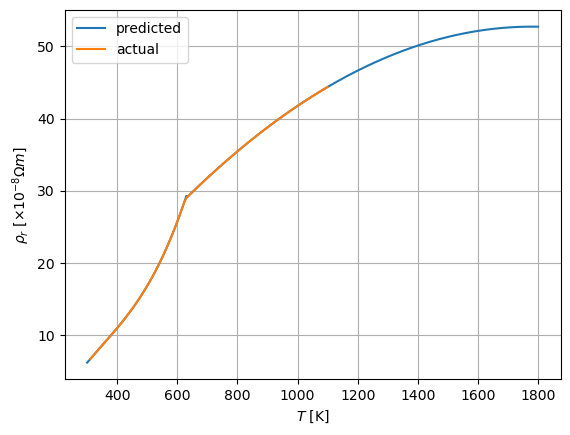

In [199]:
T_test = np.arange(300,1800,0.1)
model = []
for i in T_test:
    model.append(rho_r_disc(i))

plt.plot(T_test,model)
plt.plot(TK,rho_r)
plt.legend(["predicted", "actual"])
plt.xlabel("$T$ [K]")
plt.ylabel("$\\rho_r$ [$\\times 10^{-8} \\Omega m$]")
plt.grid(1)

To conclude, we can model the electrical resistivity of nickel as:

$$\rho_r(T_K) = \left\{
      \begin{array}{ll}
      -21.631 + 0.166T_K - (3.428\times 10^{-4})T_K^2 + (3.299\times 10^{-7})T_K^3 & T_K \in [270,630]K \\ \\
      -3.573 + (6.241\times 10^{-2})T_K - (1.680\times 10^{-5})T_K^2 - (2.744\times 10^{-10})T_K^3 & T_K \geq 630K
\end{array}
\right. $$

